# What is a Graph?


## Undirected Graphs

A *graph* $G$ consists of a nonempty set, $V(G)$, called the *vertices* of $G$, and a set $E(G)$ called the *edges* of $G$. An element of $V(G)$ is called a *vertex*. A vertex is also called a *node*; the words "vertex" and "node" are used interchangeably. An element of $E(G)$ is an *undirected* edge or simply an "edge". An undirected edge has two vertices $u\neq v$ called its endpoints. Such an edge can be represented by the two element set $\{u, v\}$. The notation $\langle u—v \rangle$ denotes this edge.
Both $\langle u—v \rangle$ and $\langle v—u \rangle$ define the same undirected edge, whose endpoints are $u$ and $v$.

![](./graph_example.png)

For example, let $H$ be the graph pictured in Figure above. The vertices of $H$
correspond to the nine dots, that is, $V(H) = \{a,b,c,d,e,f,g,h,i\}$

The edges correspond to the eight lines, that is,

$E(H) = \big\{\langle a—b \rangle,\langle a—c \rangle,\langle b—d \rangle,\langle c—d \rangle,\langle c—e \rangle,\langle e—f \rangle,\langle e—g \rangle,\langle h—i \rangle\big\} $


## Directed Graphs

A *directed graph* -or *digraph*- $G$ consists of a nonempty set $V(G)$, called the vertices of $G$, and a set $E(G)$, called the edges of $G$. An element of $V(G)$ is called a *vertex*. A vertex is also called a *node*; the words "vertex" and "node" are used interchangeably. An element of $E(G)$ is called a *directed edge*. A directed edge is also called an "arrow" or simply an "edge". A directed edge starts at some vertex $u$ called the *tail* of the edge, and ends at some vertex $v$ called the *head* of the edge.

![](./digraph_example.png)


### Vertex Degrees

The *in-degree* of a vertex in a digraph is the number of arrows coming into it, and similarly its *out-degree* is the number of arrows out of it. More precisely,

If $G$ is a *digraph* and $v \in V(G)$, then 
    
  * $indeg(v) ::= \big\vert e \in \{E(G)\, \vert\, head(e) = v \}\big\vert$
  * $outdeg(v) ::= \big\vert e \in \{E(G)\, \vert\, tail(e) = v \}\big\vert$


##### References:
The definitions above and the illustrations are taken from the book:
*Mathematics for Computer Science*, Eric Lehman, F. Tom Leighton, Albert R. Meyer
https://courses.csail.mit.edu/6.042/spring17/mcs.pdf

# Name Generator

Lets generate a directed graph -a social network-, which expresses endorsements between various people similar as in *LinkedIn*. The nodes of our digraph will be persons and the edges will represent endorsments. 


For the nodes, we will generate a set of "random" people. That is, we generate names as given in the USA randomly. A list of US American names can be received here:
http://www.census.gov/topics/population/genealogy/data/1990_census/1990_census_namefiles.html


In the following we download the files and generate three lists, one for female names, one for male names, and one for surnames.

In [18]:
import webget
import random


surnames_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.all.last'
female_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.female.first'
male_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.male.first'

webget.download(surnames_txt, to='./last_names.txt')
webget.download(female_names_txt, to='./female_names.txt')
webget.download(male_names_txt, to='./male_names.txt')


def get_names_from(file):
    names = []
    with open(file) as f:
        for line in f:
            name = line.split(' ')[0].title()
            names.append(name)
            
    return names

names = get_names_from('./last_names.txt')
female_names = get_names_from('./female_names.txt')
male_names = get_names_from('./male_names.txt')

print(len(names), len(female_names), len(male_names))

88799 4275 1219


We decide to let names be a two-element tuple consisting of a name and a surname.

In [ ]:
def random_combination(list_a, list_b):
    a = random.choice(list_a)
    b = random.choice(list_b)
    
    return (a, b)


def generate_random_names(amount=1, gender='female'):
    pre_names = (female_names, male_names)
    
    if gender == 'female':
        pre_names = pre_names[0]
    elif gender == 'male':
        pre_names = pre_names[1]
    elif gender == 'random':
        pre_names = random.choice(pre_names)

    random_names = []
    for idx in range(0, amount):    
        random_name = random_combination(pre_names, names)
        random_names.append(random_name)
        
    return random_names
    
generate_random_names(amount=10, gender='random')

# Generating Nodes

Now, that we have our name generator in place we are good to start generating our *endorsment graph*.

For our example graph, we decide that it contains 100 persons, i.e., 100 nodes. Half of the nodes represents women and the other half represents men.

In [74]:
total_no_nodes = 100
no_nodes_per_sex = total_no_nodes // 2

female_names_list = generate_random_names(amount=no_nodes_per_sex, gender='female')
male_names_list = generate_random_names(amount=no_nodes_per_sex, gender='male')

all_names_list = female_names_list + male_names_list
person_list = all_names_list

print(len(all_names_list))
print(all_names_list[:20])

100
[('Akiko', 'Amisano'), ('Rana', 'Zeavala'), ('Farrah', 'Myrum'), ('Eustolia', 'Wilkson'), ('Karlene', 'Butterfield'), ('Marivel', 'Closson'), ('Bridgette', 'Betthauser'), ('Jesus', 'Ketterer'), ('Londa', 'Mcelderry'), ('Cyndi', 'Mccowen'), ('Hong', 'Bonnette'), ('Margie', 'Weirich'), ('Suanne', 'Hanthorn'), ('Margaretta', 'Vondran'), ('Ciara', 'Weill'), ('Marchelle', 'Germain'), ('Lisbeth', 'Hendrickx'), ('Heidy', 'Gelormino'), ('Lacy', 'Doan'), ('Thanh', 'Fitton')]


# Generating Edges

endorsements randomly


Additionally, we say that it is not possible for a person to endorse herself.

In [75]:
from tqdm import tqdm
from random import randint
from numpy.random import choice


def get_no_endorsments():
    relation_classes = {
        0: (0, 0),
        1: (1, 4),
        2: (5, 10),
        3: (11, 20),
        4: (21, 50),
        5: (51, 100)
    }
    p_distribution = [0.05, 0.36, 0.45, 0.1, 0.035, 0.005]

    no_relation_class = choice(list(relation_classes.keys()), 
                               p=p_distribution)
    no_endorsments = randint(relation_classes[no_relation_class][0], 
                             relation_classes[no_relation_class][1])
    return no_endorsments


def create_endorsements(node_list):
    """Creates a list of graph edges
    like [(1,10), (50,4), (99,20000), ...]"""
    endorsements = []
    idx_list = range(len(node_list))

    for idx, name_pair in tqdm(enumerate(node_list)):
        # get how many people this person (name_pair) endorses
        no_endorsments = get_no_endorsments()
        if no_endorsments > 0:
            # get a list of potential endorsements
            potential_endorsment_idxs = random.sample(idx_list, no_endorsments)
            if idx in potential_endorsment_idxs:
                # Removing myself in case I am in the list
                # cannot endorse myself
                idx_me_in_endorsements = potential_endorsment_idxs.index(idx)
                del potential_endorsment_idxs[idx_me_in_endorsements]
    
            endorsements += list(zip([idx for _ in range(len(potential_endorsment_idxs))], potential_endorsment_idxs))
    return endorsements

endorsements = create_endorsements(person_list)

print(endorsements[:30])
print(person_list)

100it [00:00, 11460.47it/s]

[(0, 6), (0, 49), (0, 92), (0, 10), (0, 31), (0, 9), (0, 37), (0, 44), (0, 90), (0, 59), (1, 26), (1, 7), (1, 55), (1, 94), (1, 23), (1, 3), (2, 58), (2, 26), (2, 70), (2, 54), (2, 33), (3, 78), (3, 70), (3, 9), (3, 85), (4, 72), (4, 7), (4, 70), (4, 88), (4, 83)]
[('Akiko', 'Amisano'), ('Rana', 'Zeavala'), ('Farrah', 'Myrum'), ('Eustolia', 'Wilkson'), ('Karlene', 'Butterfield'), ('Marivel', 'Closson'), ('Bridgette', 'Betthauser'), ('Jesus', 'Ketterer'), ('Londa', 'Mcelderry'), ('Cyndi', 'Mccowen'), ('Hong', 'Bonnette'), ('Margie', 'Weirich'), ('Suanne', 'Hanthorn'), ('Margaretta', 'Vondran'), ('Ciara', 'Weill'), ('Marchelle', 'Germain'), ('Lisbeth', 'Hendrickx'), ('Heidy', 'Gelormino'), ('Lacy', 'Doan'), ('Thanh', 'Fitton'), ('Holli', 'Cicali'), ('Evan', 'Koussa'), ('Gerda', 'Erlwein'), ('Dalene', 'Betsill'), ('Carlyn', 'Maller'), ('Mozella', 'Valorie'), ('Barbie', 'Loli'), ('Artie', 'Muccigrosso'), ('Lucinda', 'Degracia'), ('Elenora', 'Grossklaus'), ('Rose', 'Vandenacre'), ('Tangela'

In [25]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

100


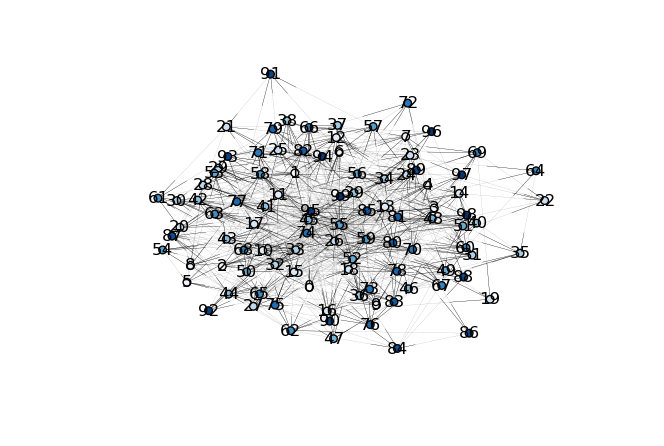

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot


def create_graph():
    graph = nx.DiGraph()
    graph.clear()

    # add node by node, needed to add attributes...
    print(len(all_names_list))

    for idx, name_pair in enumerate(all_names_list):
        graph.add_node(idx, name=' '.join(name_pair))
    
    # graph.add_nodes_from(all_names_list)
    graph.add_edges_from(endorsements)

    return graph


def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))
    
graph = create_graph()
draw_graph(graph)

#nx.write_gml(graph, './social_network.gml')

In [38]:
print(graph.node[10]['name'])
graph.out_degree(10)
graph.node[graph.out_edges(10)[0][1]]
graph.in_edges(10)
graph.node

Edra Beggs


{'name': 'Luna Inzunza'}

In [39]:
print(graph.node)
print(graph.number_of_nodes())

{0: {'name': 'Vanetta Niedermeyer'}, 1: {'name': 'Grace Sisson'}, 2: {'name': 'Deidre Rolando'}, 3: {'name': 'Chau Espenlaub'}, 4: {'name': 'Karan Devanski'}, 5: {'name': 'Epifania Counterman'}, 6: {'name': 'Greta Valido'}, 7: {'name': 'Janelle Loll'}, 8: {'name': 'Riva Gathings'}, 9: {'name': 'Louella Scanlin'}, 10: {'name': 'Edra Beggs'}, 11: {'name': 'Ernestine Kratowicz'}, 12: {'name': 'Lizzie Palomba'}, 13: {'name': 'Majorie Miran'}, 14: {'name': 'Kandace Peru'}, 15: {'name': 'Cleopatra Mirra'}, 16: {'name': 'Luna Inzunza'}, 17: {'name': 'Rosette Dougharty'}, 18: {'name': 'Leesa Gambrell'}, 19: {'name': 'Andre Cianchetti'}, 20: {'name': 'Steven Vicks'}, 21: {'name': 'Gayla Bessey'}, 22: {'name': 'Ola Fake'}, 23: {'name': 'Pearl Cleverly'}, 24: {'name': 'Ashely Robinault'}, 25: {'name': 'Marylyn Farrelly'}, 26: {'name': 'Caitlyn Serabia'}, 27: {'name': 'Corazon Jasinski'}, 28: {'name': 'Katheryn Tates'}, 29: {'name': 'Joyce Wiatrek'}, 30: {'name': 'Minerva Guyet'}, 31: {'name': 'Da

## Who is the most interesting person in out network?

Likely, you are tempted to find the person in the graph, which has the highest in-degree. For example with code similar to the following.

In [81]:
in_deg_vec = np.array([graph.in_degree(n) for n in graph.nodes()])
max_ind_deg = in_deg_vec.max()
print(np.argmax(in_deg_vec))
print(graph.node[np.argmax(in_deg_vec)]['name'])

59
Octavio Denlinger


However, there is an issue with this solution. To make yourself the most interesting person you would just have to create a lot of profiles of people endorsing you. This issue can be overcome by applying the *PageRank* algorithm.

# PageRank Algorithm



![from_book](pr_descr.png)

##### References:
The above description is from *Artificial Intelligence: A Modern Approach Third Edition* by Stuart J. Russell and Peter Norvig.

## Let's Implement PageRank Together!

Perhaps it is best, when we start implementing a function that encodes the *PageRank* formula.


$PR(p) = \frac{1-d}{N} + d \sum_{i}^{} \frac{PR(in_{i})}{C(in_{i})}$

In [79]:
import numpy as np


GLOBAL_PR = np.ones(graph.number_of_nodes())


def page_rank(node):
    n = graph.number_of_nodes()
    damping = 0.85

    pr_in = np.array([GLOBAL_PR[remote] for remote, _ in graph.in_edges(node)])
    c = np.array([graph.out_degree(remote) for remote, _ in graph.in_edges(node)])
    pr_p = ((1 - damping) / n) + (damping * np.sum(pr_in / c))

    return pr_p
        

def compute_page_rank_step(graph):
    return np.array([page_rank(n) for n in graph.nodes()])
    
    
def compute_page_rank(graph, no_it=100):
    global GLOBAL_PR
    if no_it == 'converge':
        converged = False
        it_count = 0
        while not converged:
            new_pr = compute_page_rank_step(graph)
            converged = np.array_equal(GLOBAL_PR, new_pr)
            GLOBAL_PR = new_pr 
            it_count += 1
            
        print(it_count)
    else:
        for idx in range(no_it):
            GLOBAL_PR = compute_page_rank_step(graph)
            
compute_page_rank(graph, no_it='converge')
print(GLOBAL_PR[np.argmax(GLOBAL_PR)], np.argmax(GLOBAL_PR))
print(GLOBAL_PR)

2.13004166667 12


In [80]:
print(graph.node[12]['name'])

Suanne Hanthorn
